# ****Importing Important Libraries****

In [20]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# **Reading any random companies stock csv using pandas**

In [21]:
df=pd.read_csv('../input/stock-market-india/FullDataCsv/BAJAJ_AUTO__EQ__NSE__NSE__MINUTE.csv')

# Droping all the NULL values

In [22]:
df.dropna(inplace=True)

# Chcking the top 10 values from the dataset

In [23]:
df.head(10)

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,2640.15,2654.30,2617.55,2627.00,2235.0
1,2017-01-02 09:16:00+05:30,2627.00,2646.10,2612.35,2612.35,2806.0
2,2017-01-02 09:17:00+05:30,2614.45,2614.45,2591.30,2596.00,7443.0
3,2017-01-02 09:18:00+05:30,2596.00,2596.00,2587.75,2590.80,3289.0
4,2017-01-02 09:19:00+05:30,2593.00,2596.95,2584.00,2589.95,4862.0
5,2017-01-02 09:20:00+05:30,2587.95,2589.35,2583.00,2583.15,2551.0
6,2017-01-02 09:21:00+05:30,2583.00,2596.95,2581.00,2591.40,4544.0
7,2017-01-02 09:22:00+05:30,2591.40,2599.00,2591.40,2599.00,2404.0
8,2017-01-02 09:23:00+05:30,2599.00,2602.80,2598.85,2600.00,2241.0
9,2017-01-02 09:24:00+05:30,2600.00,2603.20,2598.65,2603.20,1145.0


# Ploting Close Price History using matplotlib

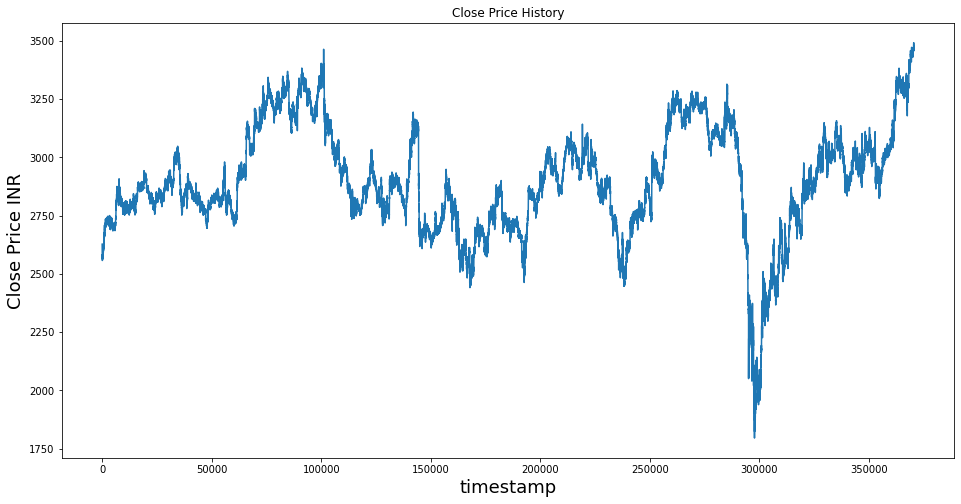

In [24]:
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
#ax=sns.lineplot(data=df, x='timestamp',y='close', color="blue");
plt.xlabel('timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

# Converting data to a numpy array

In [25]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8) 

In [26]:
dataset

array([[2627.  ],
       [2612.35],
       [2596.  ],
       ...,
       [3470.45],
       [3472.2 ],
       [3479.  ]])

# Transforming the dataset array to range between 0 and 1

In [27]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [28]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# Spliting data for training and testing

In [29]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# **Building a LSTM Model for Stock Market Prediction**

In [31]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# **Using adam optimizer and mean_squared_error as the loss function**

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
model.fit(x_train, y_train, batch_size=64, epochs=1)

4630/4630 [==============================] - 389s 83ms/step - loss: 0.0015


In [34]:
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [35]:
x_test = np.array(x_test)

In [36]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [37]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

# Finding the root mean squared error

In [38]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

12.734749963439516

# **Plotting the predicted values**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


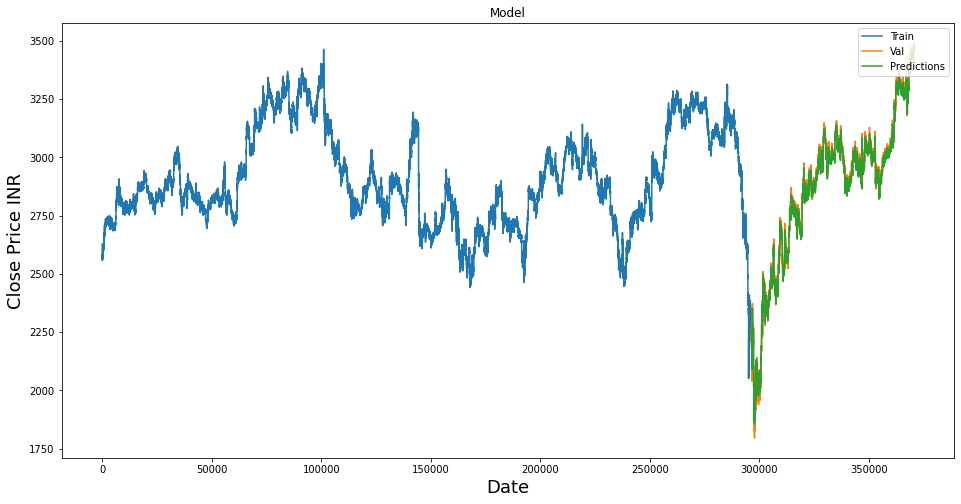

In [40]:
train = data[:training_data_len]
display = data[training_data_len:]
display['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['close'])
plt.plot(display['close'])
plt.plot(display['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

# **It is clear from the graph, the model predicted the close price quiet accurately**
# Thank you and please upvote if you like my work!